# Functions utilized

In [269]:
def univariate(df, sample=500):
    import pandas as pd
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
                                       'median', 'max', 'mode', 'mean', 'std', 'skew'])

    for col in df:
        dtype = df[col].dtype
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        try:
            mode = df[col].mode().iloc[0]
        except:
            mode = None

        if pd.api.types.is_numeric_dtype(df[col]):
            min_ = df[col].min()
            max_ = df[col].max()
            mean = df[col].mean()
            median = df[col].median()
            std = df[col].std()
            skew = df[col].skew()
            df_results.loc[col] = ['-', dtype, missing, unique, min_, median, max_, mode,
                                   round(mean, 2), round(std, 2), round(skew, 2)]
        else:
            try:
                flag = df[col].value_counts(normalize=True).lt(0.05).sum()
            except:
                flag = None
            df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

    # Countplots: categorical or binary features
    countplots = df_results[(df_results['type'] == 'object') | (df_results['unique'] == 2)]

    # Histograms: numeric with more than 2 unique values
    histograms = df_results[
        (df_results['type'].isin(['float64', 'int64'])) &
        (df_results['unique'].astype(float) > 2)
    ]

    # Plot countplots
    n = countplots.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        ax = ax.flatten() if n > 1 else [ax]
        for i, col in enumerate(countplots.index):
            try:
                sns.countplot(data=df, x=col, color='g', ax=ax[i])
                ax[i].set_ylabel('')
                ax[i].tick_params(labelrotation=90, left=False)
                ax[i].xaxis.set_label_position('top')
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Countplot error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    # Plot histograms
    n = histograms.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        
        if isinstance(ax, (np.ndarray, list)):
            ax = ax.flatten() if hasattr(ax, 'flatten') else list(ax)
        else:
            ax = [ax]

        for i, col in enumerate(histograms.index):
            try:
                sns.histplot(data=df.sample(n=min(sample, len(df)), random_state=1), x=col, color='b', ax=ax[i], kde=True)
                ax[i].set_ylabel('')
                ax[i].tick_params(left=False)
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Histogram error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    return df_results

In [270]:
import pandas as pd


def bin_categories(df: pd.DataFrame, colsToBin=[], cutoff=0.05, messages=True, replace_with='Other'):
    import pandas as pd

    # If no cols specified, apply to all columns
    if len(colsToBin) == 0: colsToBin = df.columns

    for col in colsToBin:
        if not pd.api.types.is_numeric_dtype(df[col]):
            if messages: print("Categorical")
            # Measure % of group values
            # Filter out all groups that represent counts that are < cutoff %
            # Change remaining group occurrences to replace_with var

            other_list = df[col].value_counts()[df[col].value_counts() / df.shape[0] < cutoff].index
            df.loc[df[col].isin(other_list), col] = replace_with

        else:
            if messages: print("Non-Categorical")

    return df

# General Data Understanding

In [271]:
import pandas as pd

# Set option to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_movies = pd.read_csv('movies_titles.csv')
df_users = pd.read_csv('movies_users.csv')
df_triple = pd.read_csv('movies_ratings.csv')

display(df_triple.head())
display(df_users.head())
display(df_movies.head())


,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


,user_id,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
0,1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
1,2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
2,3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
3,4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
4,5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


,show_id,type,title,director,cast,country,release_year,rating,duration,description,genre,Action,Adventure,Anime Series International TV Shows,British TV Shows Docuseries International TV Shows,Children,Comedies,Comedies Dramas International Movies,Comedies International Movies,Comedies Romantic Movies,Crime TV Shows Docuseries,Documentaries,Documentaries International Movies,Docuseries,Dramas,Dramas International Movies,Dramas Romantic Movies,Family Movies,Fantasy,Horror Movies,International Movies Thrillers,International TV Shows Romantic TV Shows TV Dramas,Kids' TV,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,Documentaries,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,"Dramas, TV Dramas",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Action, Adventure, TV Action",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,"Comedies, TV Comedies",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


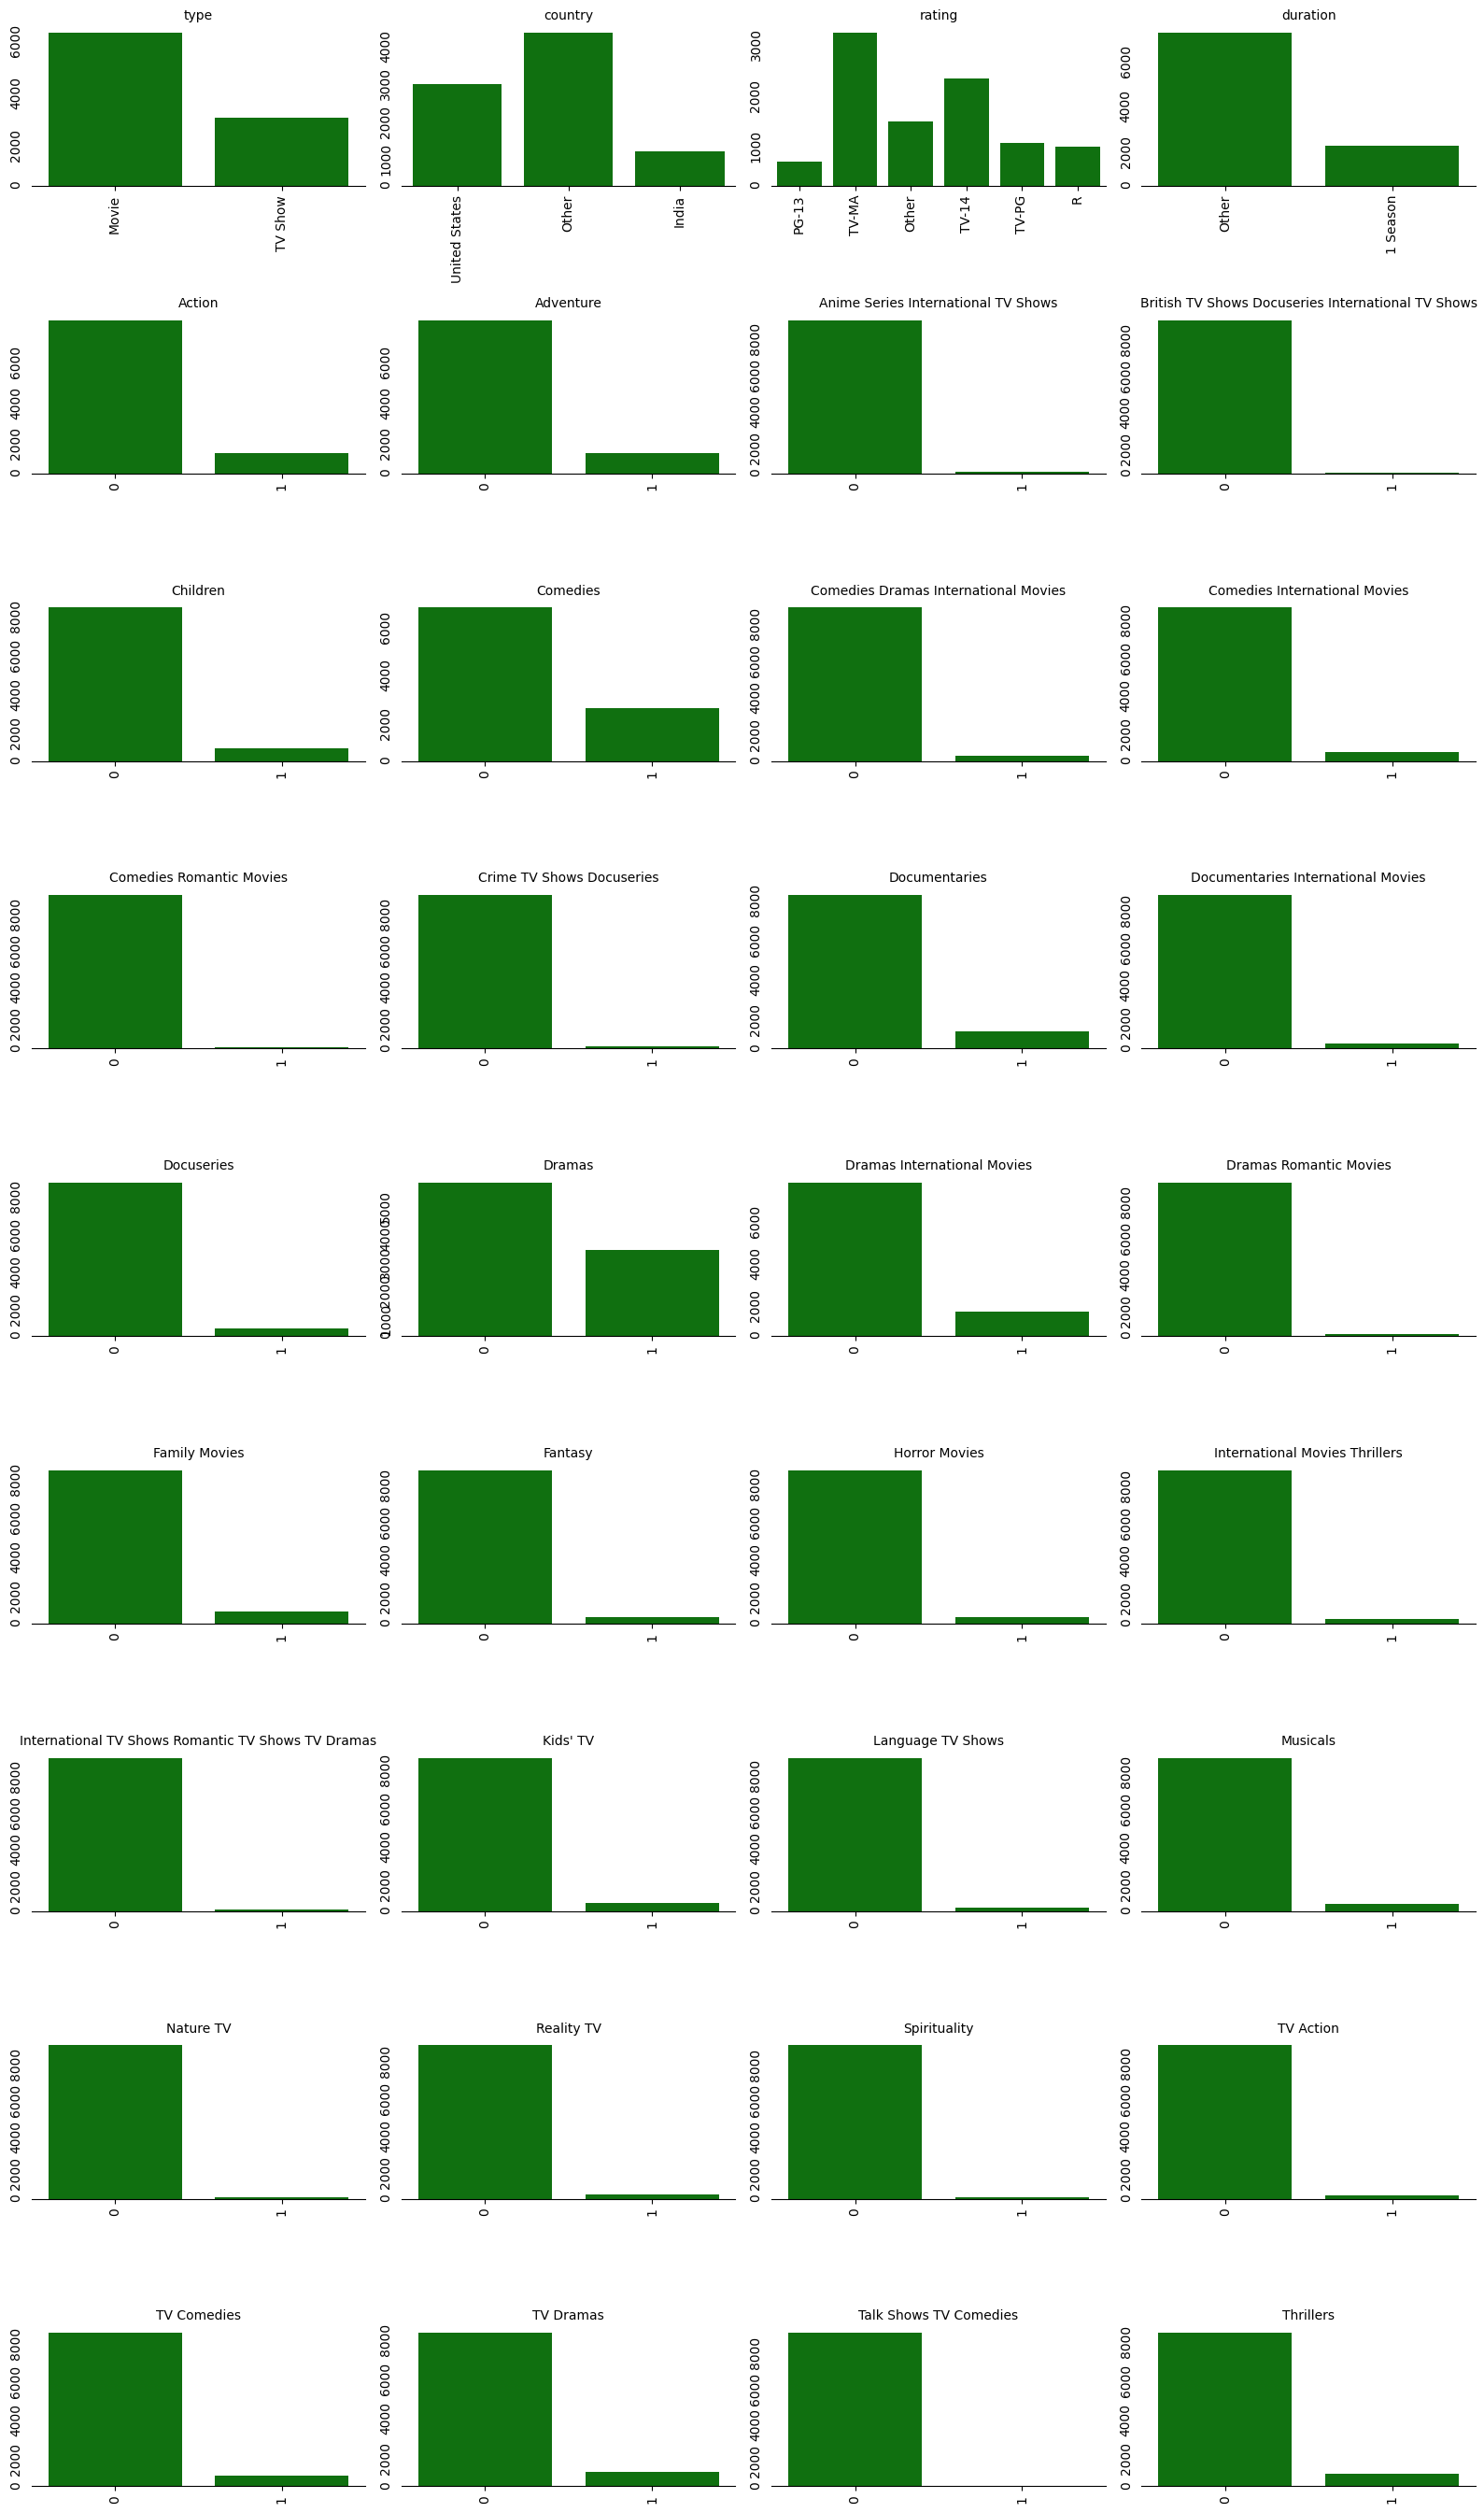

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
type,0,object,0,2,-,-,-,Movie,-,-,-
country,0,object,814,3,-,-,-,Other,-,-,-
release_year,-,int64,0,74,1925,2017.0,2021,2018,2014.19,8.84,-3.47
rating,0,object,4,6,-,-,-,TV-MA,-,-,-
duration,0,object,1,2,-,-,-,Other,-,-,-
Action,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Adventure,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Anime Series International TV Shows,-,int64,0,2,0,0.0,1,0,0.01,0.12,8.43
British TV Shows Docuseries International TV Shows,-,int64,0,2,0,0.0,1,0,0.0,0.06,17.04
Children,-,int64,0,2,0,0.0,1,0,0.07,0.26,3.23


In [272]:
bin_categories(df_movies, messages=False, colsToBin=['type','country','release_year','rating','duration'])
univariate(df_movies.drop(columns=['genre','show_id', 'title','director','cast','description']))

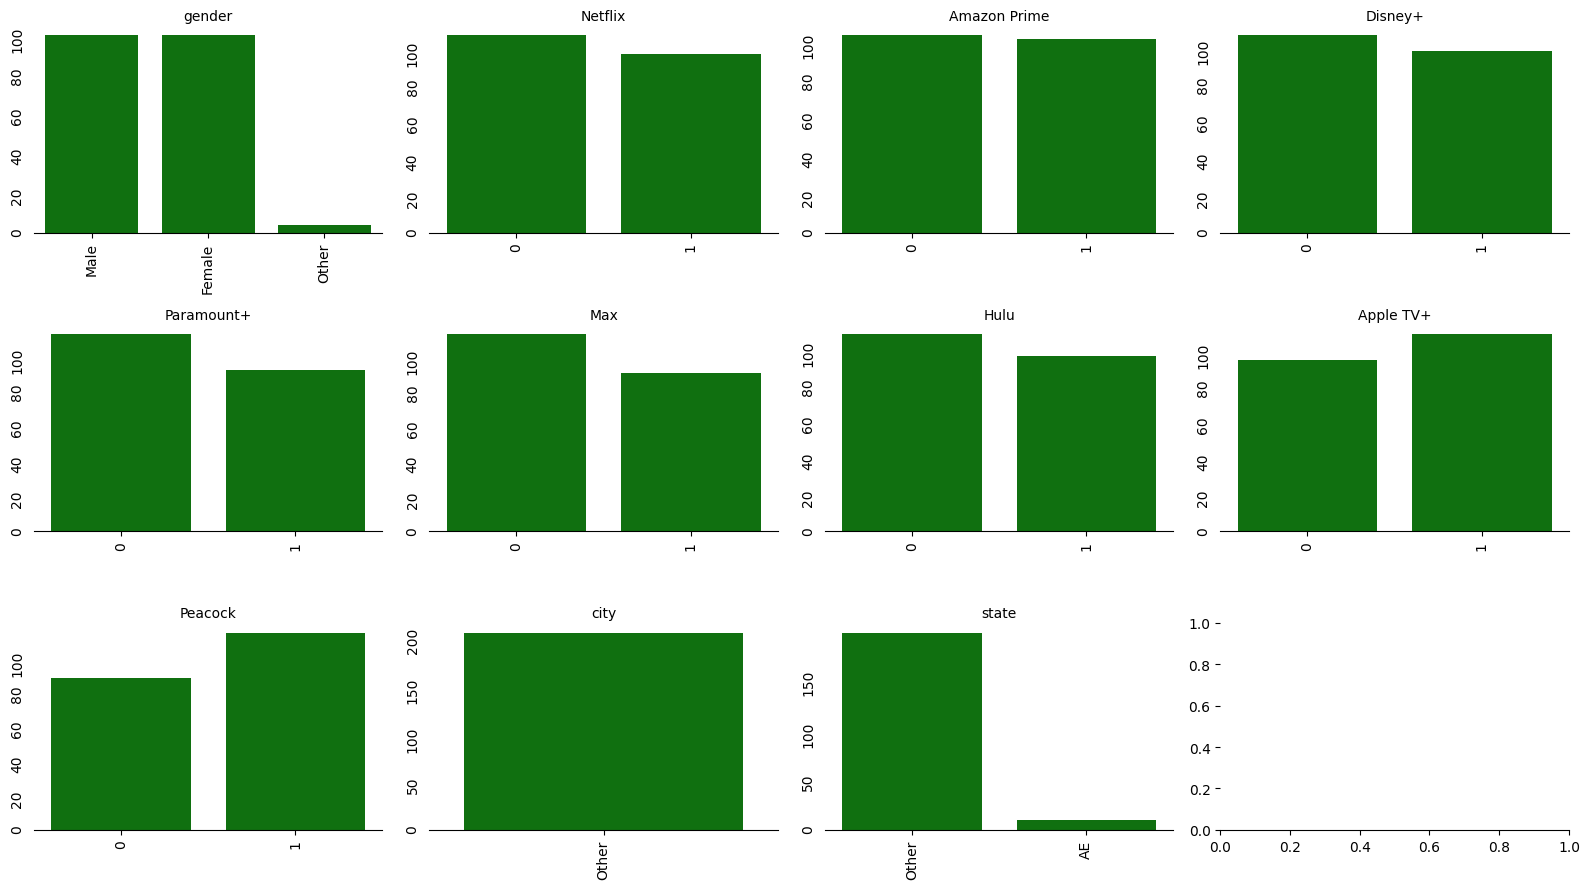

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
user_id,-,int64,0,200,1,100.5,200,1,100.5,57.88,0.0
age,-,int64,0,47,18,42.0,65,30,41.61,13.54,-0.03
gender,1,object,0,3,-,-,-,Female,-,-,-
Netflix,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.1
Amazon Prime,-,int64,0,2,0,0.0,1,0,0.5,0.5,0.02
Disney+,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.08
Paramount+,-,int64,0,2,0,0.0,1,0,0.45,0.5,0.2
Max,-,int64,0,2,0,0.0,1,0,0.44,0.5,0.22
Hulu,-,int64,0,2,0,0.0,1,0,0.47,0.5,0.12
Apple TV+,-,int64,0,2,0,1.0,1,1,0.54,0.5,-0.14


In [273]:
bin_categories(df_users, messages=False)
univariate(df_users.drop(columns=['name','phone','email']))

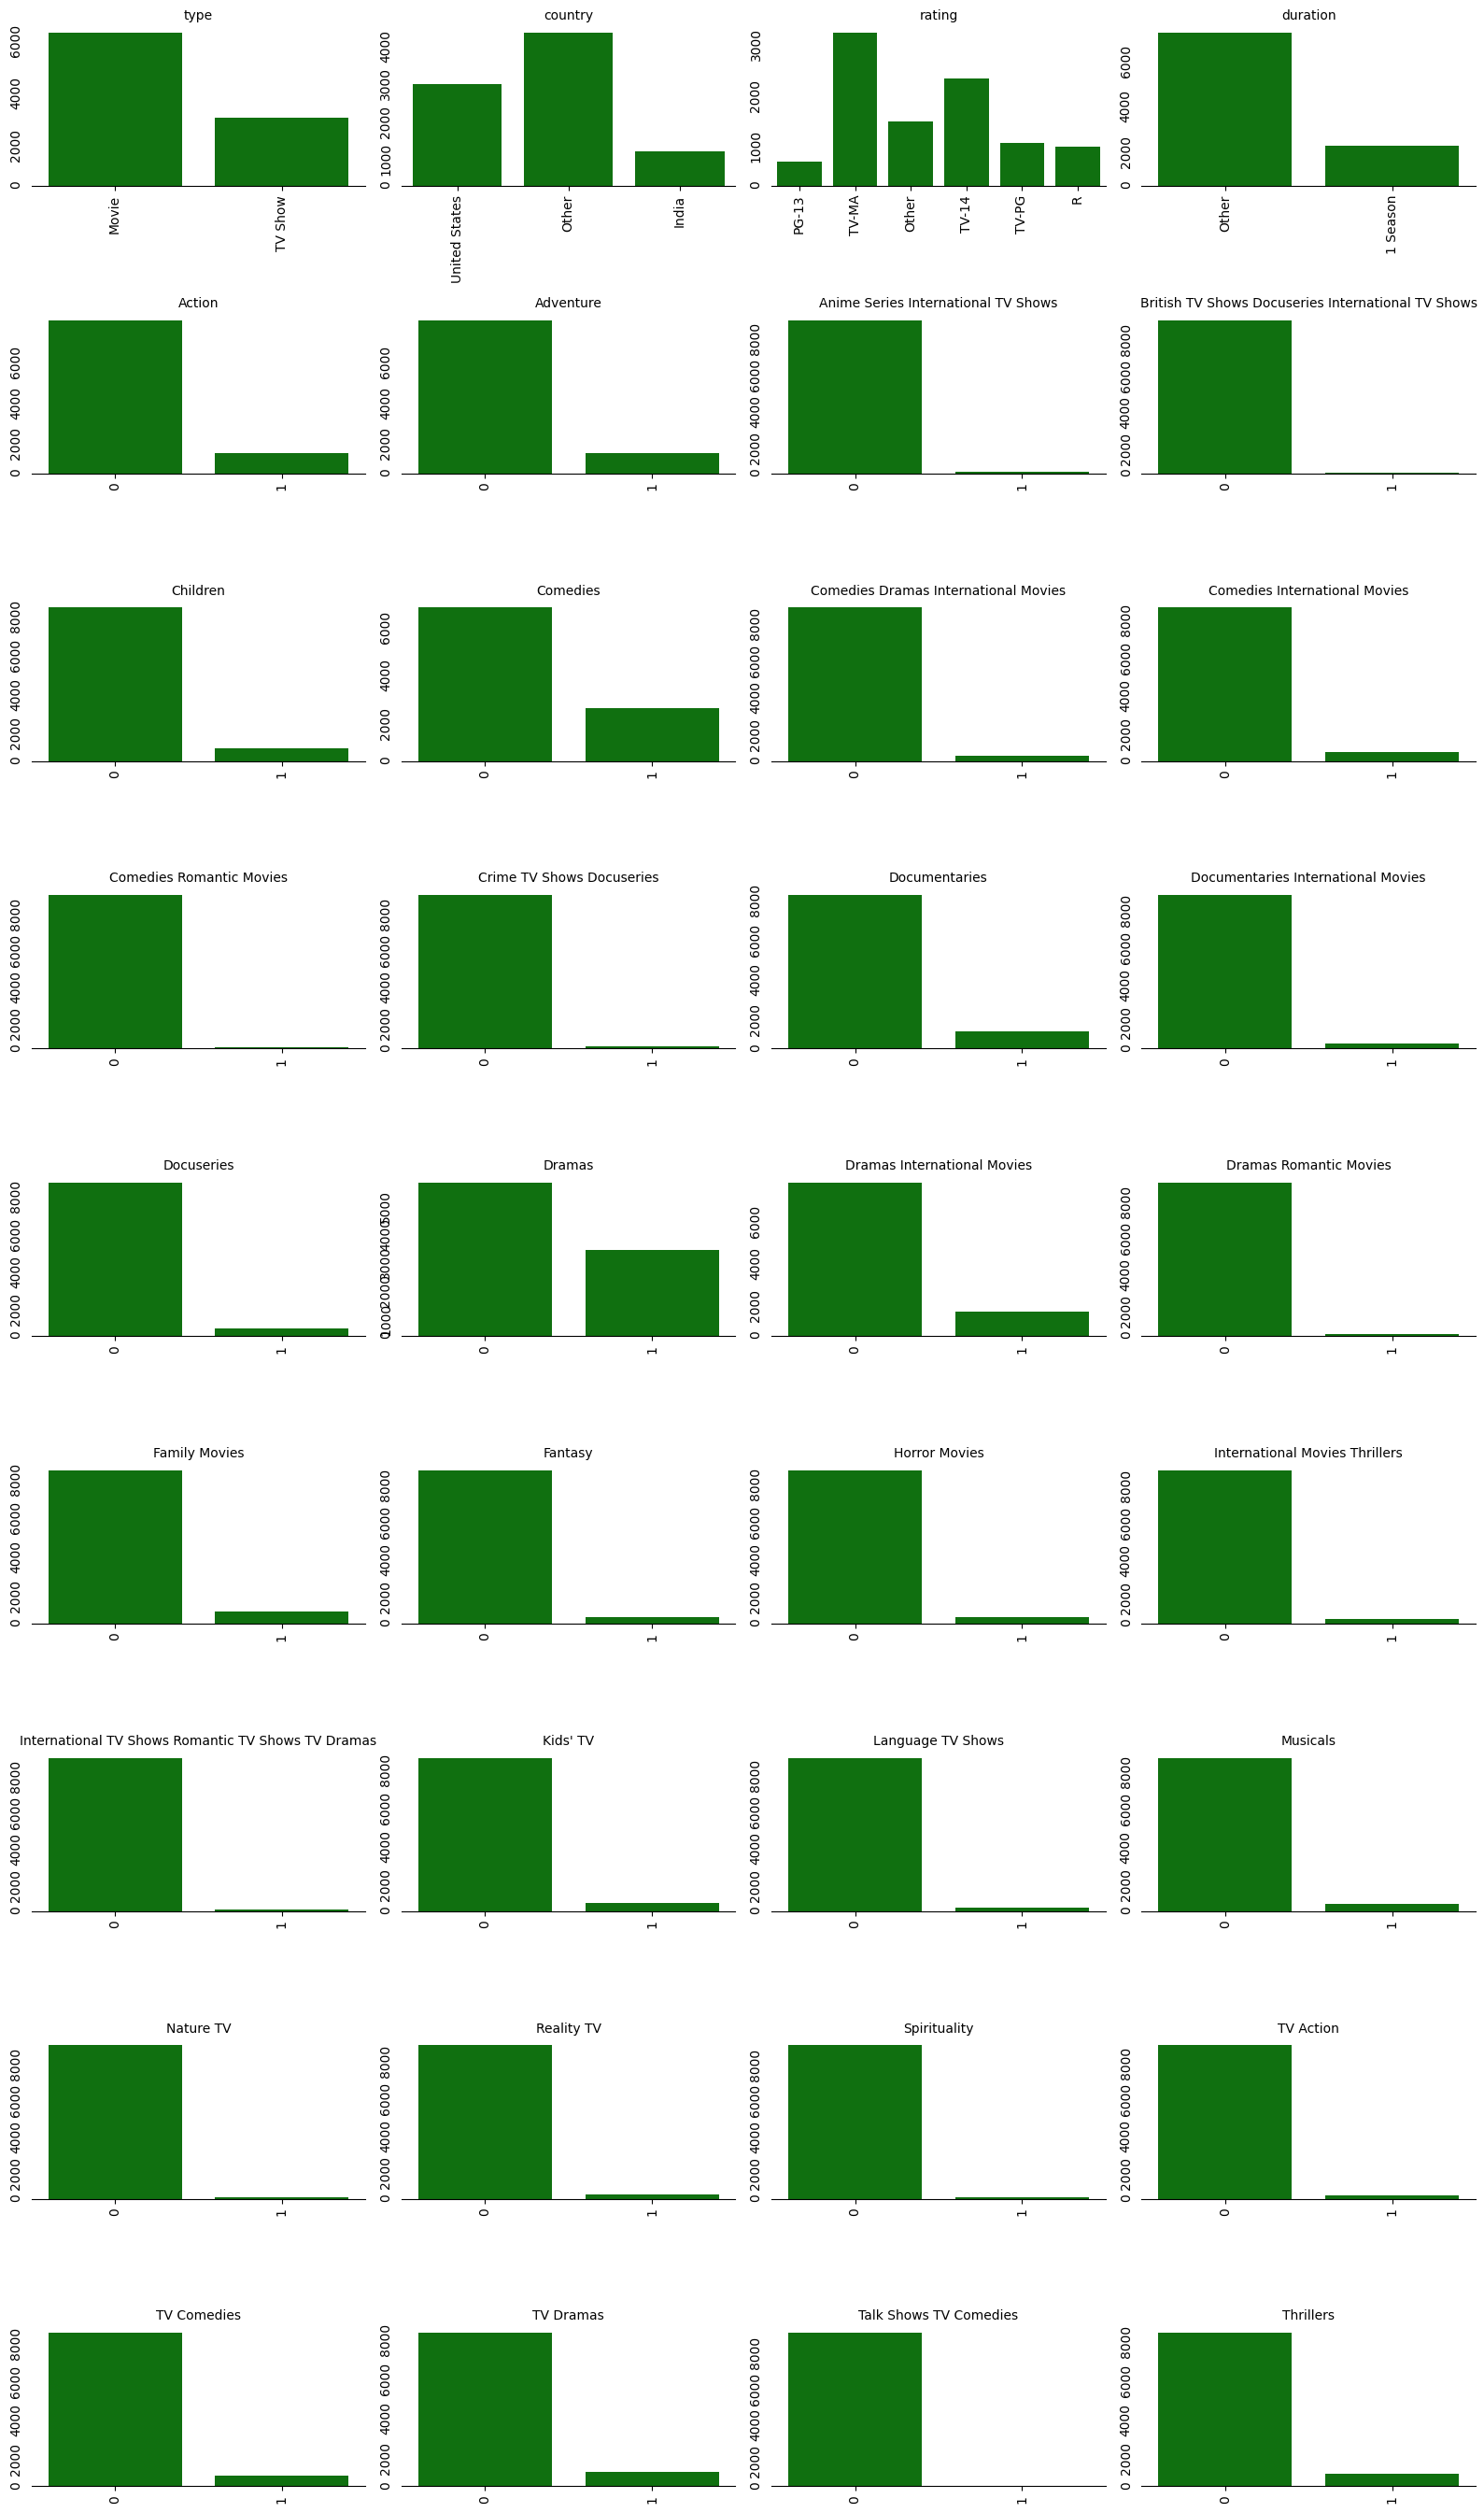

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
type,0,object,0,2,-,-,-,Movie,-,-,-
country,0,object,814,3,-,-,-,Other,-,-,-
release_year,-,int64,0,74,1925,2017.0,2021,2018,2014.19,8.84,-3.47
rating,0,object,4,6,-,-,-,TV-MA,-,-,-
duration,0,object,1,2,-,-,-,Other,-,-,-
Action,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Adventure,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Anime Series International TV Shows,-,int64,0,2,0,0.0,1,0,0.01,0.12,8.43
British TV Shows Docuseries International TV Shows,-,int64,0,2,0,0.0,1,0,0.0,0.06,17.04
Children,-,int64,0,2,0,0.0,1,0,0.07,0.26,3.23


In [274]:
def missing_drop(df, label, row_thresh=0.7, col_thresh=0.9, drop_all=False):
  # Drop any row that has a missing label
  df.dropna(axis='rows', subset=[label], inplace=True)

  # Drop rows and columns have are 100% missing
  df.dropna(axis='columns', thresh=1, inplace=True)
  df.dropna(axis='rows', thresh=1, inplace=True)

  # Drop rows and columns that are below the thresholds
  df.dropna(axis='columns', thresh=round(df.shape[0] * row_thresh), inplace=True)
  df.dropna(axis='rows', thresh=round(df.shape[1] * col_thresh), inplace=True)

  # If you don't want to leave anything behind to impute:
  if drop_all:
    df.dropna(axis='rows', inplace=True)

  return df

missing_drop(df=df_movies, label='title')

univariate(df_movies.drop(columns=['genre', 'show_id', 'title','director','cast','description']))

# Modeling

## Generic Collaborative Filtering Model


In [275]:
df_triple.sort_values(by=['user_id','show_id','rating'], inplace=True)
df_triple.head()

,user_id,show_id,rating
7,1,s2361,3
10,1,s242,3
5,1,s2917,3
3,1,s294,3
2,1,s3181,4


In [276]:
from sqlalchemy import create_engine
import pandas as pd

# Define your Azure SQL connection details
server = '1-10intex.database.windows.net'
database = 'Movies'
username = 'pigadmin'
password = 'Superduperstrongpassword!'
driver = 'ODBC Driver 18 for SQL Server'  # Or other valid installed driver

# Encode the driver string for URL
driver_encoded = driver.replace(' ', '+')


# Create the connection URL
connection_string = f'mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver_encoded}&Encrypt=yes&TrustServerCertificate=no&Connection Timeout=30'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

query = "SELECT * FROM movies_ratings"
df_triple_db = pd.read_sql(query, engine)
df_triple_db.head()

df_triple = df_triple_db

### Data Understanding

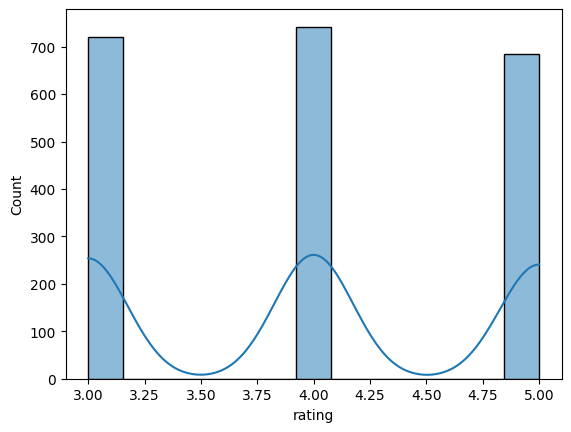

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x='rating', kde=True);

In [278]:
n_ratings = len(df_triple)
n_movies = len(df_triple['show_id'].unique())
n_users = len(df_triple['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 2147
Number of unique movieId's: 1809
Number of unique users: 200
Average ratings per user: 10.73
Average ratings per movie: 1.19


In [279]:
df_triple['show_id'].value_counts()

show_id
s7748    4
s6508    4
s8804    4
s540     4
s3282    4
s2179    4
s5113    3
s2418    3
s8175    3
s8575    3
s6162    3
s2932    3
s2568    3
s188     3
s4901    3
s2087    3
s8545    3
s3841    3
s5357    3
s856     3
s1979    3
s8276    3
s8750    3
s640     3
s6865    3
s1515    3
s3852    3
s322     3
s3608    3
s3371    3
s7647    3
s1041    3
s8636    3
s3921    3
s1818    3
s5438    3
s6510    3
s775     2
s7588    2
s5100    2
s6755    2
s4031    2
s7506    2
s3605    2
s18      2
s4277    2
s2768    2
s3996    2
s327     2
s4622    2
s2378    2
s7531    2
s1211    2
s4030    2
s7941    2
s1982    2
s1366    2
s2800    2
s6614    2
s6254    2
s246     2
s3867    2
s2383    2
s2985    2
s6050    2
s4634    2
s3380    2
s7303    2
s4512    2
s268     2
s5752    2
s2465    2
s7121    2
s3893    2
s6103    2
s2166    2
s2123    2
s5035    2
s3765    2
s5245    2
s26      2
s2254    2
s3742    2
s887     2
s401     2
s3051    2
s849     2
s1896    2
s2692    2
s167     2
s4

In [280]:
print('Min:\t\t', df_triple['show_id'].value_counts().min())
print('Quartile 1:\t', df_triple['show_id'].value_counts().quantile(.25))
print('Median:\t\t', df_triple['show_id'].value_counts().quantile(.5))
print('Quartile 3:\t', df_triple['show_id'].value_counts().quantile(.75))
print('Max:\t\t', df_triple['show_id'].value_counts().max())

Min:		 1
Quartile 1:	 1.0
Median:		 1.0
Quartile 3:	 1.0
Max:		 4


### Data Prep


In [295]:
# Store the count of ratings for each movie
value_counts = df_triple['show_id'].value_counts()

# Make a list of those with 2 or more ratings
# Over 75% of the movies have only 1 rating
# TODO decide how many counts to run
keep_list = value_counts[value_counts >= 1]
print(len(keep_list), 'movies with at least 1 rating\n')
keep_list

1809 movies with at least 1 rating



show_id
s7748    4
s6508    4
s8804    4
s540     4
s3282    4
s2179    4
s5113    3
s2418    3
s8175    3
s8575    3
s6162    3
s2932    3
s2568    3
s188     3
s4901    3
s2087    3
s8545    3
s3841    3
s5357    3
s856     3
s1979    3
s8276    3
s8750    3
s640     3
s6865    3
s1515    3
s3852    3
s322     3
s3608    3
s3371    3
s7647    3
s1041    3
s8636    3
s3921    3
s1818    3
s5438    3
s6510    3
s775     2
s7588    2
s5100    2
s6755    2
s4031    2
s7506    2
s3605    2
s18      2
s4277    2
s2768    2
s3996    2
s327     2
s4622    2
s2378    2
s7531    2
s1211    2
s4030    2
s7941    2
s1982    2
s1366    2
s2800    2
s6614    2
s6254    2
s246     2
s3867    2
s2383    2
s2985    2
s6050    2
s4634    2
s3380    2
s7303    2
s4512    2
s268     2
s5752    2
s2465    2
s7121    2
s3893    2
s6103    2
s2166    2
s2123    2
s5035    2
s3765    2
s5245    2
s26      2
s2254    2
s3742    2
s887     2
s401     2
s3051    2
s849     2
s1896    2
s2692    2
s167     2
s4

In [282]:
print(df_triple.shape)
df_triple = df_triple.loc[df_triple['show_id'].isin(keep_list.index)]
print(df_triple.shape)
print("Ratings per movie:\t", df_triple.shape[0]/len(keep_list))

(2147, 3)
(2147, 3)
Ratings per movie:	 1.1868435599778884


In [283]:
duplicate_ratings = df_triple.duplicated(subset=['user_id', 'show_id']).sum()
print(f"Duplicate ratings: {duplicate_ratings}")

if duplicate_ratings > 0:
    print(f'Total rows before dropping duplicates: {df_triple.shape[0]}')

    # keep='last' if you want to keep the last record
    # keep=False if you want to drop all duplicates
    df_triple.drop_duplicates(subset=['user_id', 'show_id'], keep='first', inplace=True)

    # These print statements are just a 'sanity check' to make sure we truly didn't have duplicates
    print(f'Total rows after dropping duplicates: {df_triple.shape[0]}')

Duplicate ratings: 0


,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


,show_id,type,title,director,cast,country,release_year,rating,duration,description,genre,Action,Adventure,Anime Series International TV Shows,British TV Shows Docuseries International TV Shows,Children,Comedies,Comedies Dramas International Movies,Comedies International Movies,Comedies Romantic Movies,Crime TV Shows Docuseries,Documentaries,Documentaries International Movies,Docuseries,Dramas,Dramas International Movies,Dramas Romantic Movies,Family Movies,Fantasy,Horror Movies,International Movies Thrillers,International TV Shows Romantic TV Shows TV Dramas,Kids' TV,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,Other,As her father nears the end of his life filmma...,Documentaries,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,Other,2021,TV-MA,Other,After crossing paths at a party a Cape Town te...,"Dramas, TV Dramas",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Action, Adventure, TV Action",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,Other,In a city of coaching centers known to train I...,"Comedies, TV Comedies",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


         ratings_count  ratings_mean
show_id                             
s1004                1      5.000000
s1005                1      3.000000
s1006                1      5.000000
s1007                1      4.000000
s1018                1      5.000000
s1028                1      3.000000
s1037                2      3.000000
s1040                1      5.000000
s1041                3      4.666667
s1060                2      4.500000
s1061                1      5.000000
s1063                1      3.000000
s1068                1      3.000000
s1073                1      4.000000
s1078                1      5.000000
s1079                1      3.000000
s1080                2      4.000000
s1081                1      4.000000
s1083                2      3.500000
s1085                1      3.000000
s1087                1      5.000000
s1096                1      5.000000
s11                  1      4.000000
s1102                1      4.000000
s1109                1      5.000000
s

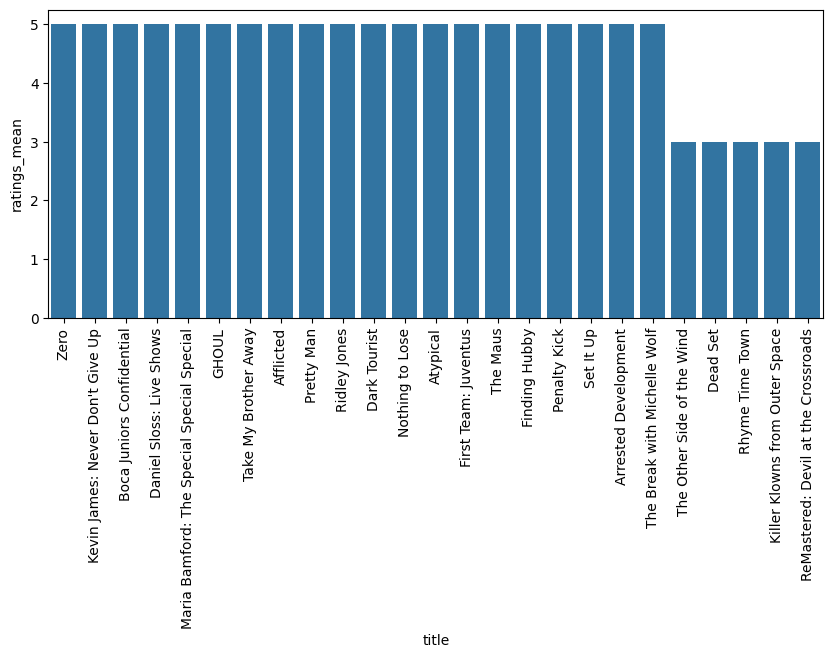

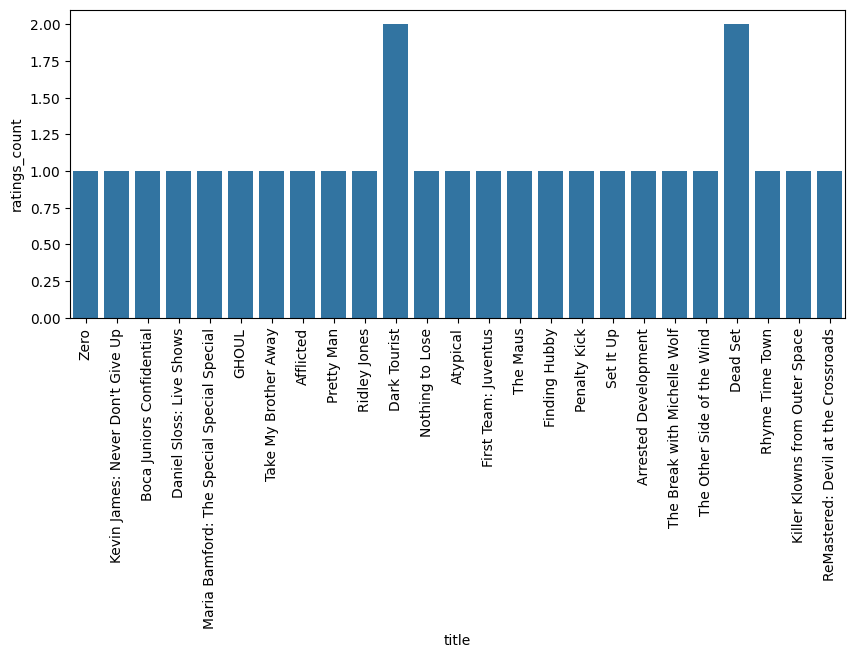

In [284]:
display(df_triple.head())
display(df_movies.head())

# Group the rows into individual titles and calculate the mean rating for each row
movie_stats = df_triple.groupby(by=['show_id'])[['rating']].agg(['count', 'mean'])
movie_stats.columns = ['ratings_count', 'ratings_mean'] # Rename the columns to simplify the index

# Join with df_movies to get the titles
print(movie_stats)
df_movies_indexed = df_movies.set_index('show_id')
movie_stats = movie_stats.join(df_movies_indexed['title'])

# Sort the ratings
movie_stats = movie_stats.sort_values(by=['ratings_mean'], ascending=False)

# Create a smaller dataset of the top n and bottom n rated movies
df_reduced = pd.concat([movie_stats.head(20), movie_stats.tail(5)])

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_mean')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_count')
plt.xticks(rotation=90)
plt.show()

### Modeling Prep

In [285]:
import numpy as np
from scipy.sparse import csr_matrix

U = df_triple['user_id'].nunique()   # Number of users for the matrix
I = df_triple['show_id'].nunique()  # Number of items for the matrix

# Map user and movie IDs to matrix indices
user_mapper = dict(zip(np.unique(df_triple['user_id']), list(range(U))))
item_mapper = dict(zip(np.unique(df_triple['show_id']), list(range(I))))

# Map maxtrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_triple['user_id'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_triple['show_id'])))

# Create a list of index values for the csr_matrix for users and movies
user_index = [user_mapper[i] for i in df_triple['user_id']]
item_index = [item_mapper[i] for i in df_triple['show_id']]

# Build the final matrix which will look like: (movieId, userId) rating
X = csr_matrix((df_triple['rating'], (item_index, user_index)), shape=(I, U))

# Print each item out to see how they all work together.
# Each object is used to create the next object.
# We don't have to print these out; this is just to help you understand.
print(f'Number of users: {U}')
print(f'Number of items: {I}')
print(f'user_mapper:\t {len(user_mapper.keys())}   keys:values {user_mapper}')
print(f'item_mapper:\t {len(item_mapper.keys())}  keys:values {item_mapper}')
print(f'user_index:\t {len(user_index)} values\t   {user_index}')
print(f'item_index:\t {len(item_index)} values\t   {item_index}')
print(f'user_inv_mapper: {len(user_inv_mapper.keys())}   keys:values {user_inv_mapper}')
print(f'item_inv_mapper: {len(item_inv_mapper.keys())}  keys:values {item_inv_mapper}')
print(f'X: {X}')

Number of users: 200
Number of items: 1809
user_mapper:	 200   keys:values {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11): 10, np.int64(12): 11, np.int64(13): 12, np.int64(14): 13, np.int64(15): 14, np.int64(16): 15, np.int64(17): 16, np.int64(18): 17, np.int64(19): 18, np.int64(20): 19, np.int64(21): 20, np.int64(22): 21, np.int64(23): 22, np.int64(24): 23, np.int64(25): 24, np.int64(26): 25, np.int64(27): 26, np.int64(28): 27, np.int64(29): 28, np.int64(30): 29, np.int64(31): 30, np.int64(32): 31, np.int64(33): 32, np.int64(34): 33, np.int64(35): 34, np.int64(36): 35, np.int64(37): 36, np.int64(38): 37, np.int64(39): 38, np.int64(40): 39, np.int64(41): 40, np.int64(42): 41, np.int64(43): 42, np.int64(44): 43, np.int64(45): 44, np.int64(46): 45, np.int64(47): 46, np.int64(48): 47, np.int64(49): 48, np.int64(50): 49, np.int64(51): 50, np.int64(52): 51, np.int6

In [286]:
def create_matrix(df, user, item, rating):
    import numpy as np
    from scipy.sparse import csr_matrix

    U = df[user].nunique()  # Number of users for the matrix
    I = df[item].nunique()  # Number of items for the matrix

    # Map user and movie IDs to matrix indices
    user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
    item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

    # Map matrix indices back to IDs
    user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
    item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

    # Create a list of index values for the csr_matrix for users and movies
    user_index = [user_mapper[i] for i in df[user]]
    item_index = [item_mapper[i] for i in df[item]]

    # Build the final matrix which will look like: (movieId, userId) rating
    X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [287]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'user_id', 'show_id', 'rating')

print(X) # (movieId, userId)   rating
print(user_mapper)
print(user_inv_mapper)
print(item_mapper)
print(item_inv_mapper)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2147 stored elements and shape (1809, 200)>
  Coords	Values
  (0, 179)	5
  (1, 103)	3
  (2, 67)	5
  (3, 99)	4
  (4, 144)	5
  (5, 158)	3
  (6, 50)	3
  (6, 124)	3
  (7, 171)	5
  (8, 19)	5
  (8, 78)	5
  (8, 138)	4
  (9, 4)	5
  (9, 160)	4
  (10, 176)	5
  (11, 121)	3
  (12, 112)	3
  (13, 136)	4
  (14, 78)	5
  (15, 132)	3
  (16, 142)	4
  (16, 193)	4
  (17, 52)	4
  (18, 53)	3
  (18, 54)	4
  :	:
  (1785, 28)	5
  (1786, 180)	3
  (1787, 1)	3
  (1788, 151)	3
  (1789, 47)	4
  (1789, 165)	3
  (1790, 24)	4
  (1791, 148)	3
  (1792, 35)	4
  (1793, 30)	4
  (1794, 166)	4
  (1795, 142)	4
  (1796, 110)	4
  (1797, 69)	3
  (1798, 175)	3
  (1799, 65)	4
  (1800, 180)	3
  (1801, 170)	5
  (1802, 155)	4
  (1803, 125)	5
  (1804, 184)	5
  (1805, 40)	5
  (1806, 33)	5
  (1807, 33)	3
  (1808, 120)	5
{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9,

### Model Fitting

In [288]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
    from sklearn.neighbors import NearestNeighbors
    
    rec_ids = []                # Make a list for the recommended item IDs we'll get later
    item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
    item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function
    
    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
    
    # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
    rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
    rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
    rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
    rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself
    
    # We need to replace the recommended item indeces with their original item IDs
    for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
        rec_ids.append(item_inv_mapper[rec_indeces[i]])
        
    # It may help to see what this is. The distance list is first and the recommended item indeces are second
    if messages:
        print(f'List of recommended item indeces:\n{rec_indeces}\n')
        print(f'List of recommended item IDs:\n{rec_ids}\n')
        print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')
    
    # Return two lists: the original item IDs of the recommendations and their similarity scores
    return rec_ids, rec_distances

#### Movie Specific Recommender

In [289]:
movie_id = 's1037'
similar_ids = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10)

movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
print(f"If you like {movie_title}, you may also enjoy:\n")

for i in similar_ids[0]:
    i_str = str(i)  # Make sure it's a string like 's1037'
    title_match = df_movies.loc[df_movies['show_id'] == i_str, 'title']
    if not title_match.empty:
        title = title_match.values[0]
        print(f"\t{title}")
    else:
        print(f"\t[Title not found for show_id: {i_str}]")

List of recommended item indeces:
[   6 1642 1143  330  698 1310  954  883  134 1504 1079]

List of recommended item IDs:
['s8221', 's5783', 's2391', 's3955', 's6635', 's4937', 's4648', 's162', 's7599', 's5451']

List of recommended item similarity to selected item:
[0.29289322 0.29289322 0.29289322 0.29289322 0.29289322 0.29289322
 0.29289322 0.29289322 0.29289322 0.29289322]

If you like Time Trap, you may also enjoy:

	The Box
	Amanda Knox
	How to Get Away with Murder
	Love O2O
	Doom
	Orbiter 9
	Daniel Sloss: Live Shows
	Mars Attacks!
	Not Alone
	How to Stage a Coup


#### User Specific Recommender

In [290]:
user_id = 150   # Select a user
k = 20          # Select the number of recommendations to give them; movies they've seen will be removed from this total

# Filter the data by only those movies rated by this user
df_user_ratings = df_triple[df_triple['user_id']==user_id]

# Find the movies with the max ratings for this user
max_rating = df_user_ratings['rating'].max()
df_favorites = df_user_ratings[df_user_ratings['rating'] == max_rating]['show_id']

# Randomly select one of their top rated movies
movie_id = df_favorites.sample(n=1).iloc[0]

# Get a list of recommendations based on their top rated movie
rec_ids, rec_distances = recommend(movie_id, X, item_mapper=item_mapper, item_inv_mapper=item_inv_mapper, 
                                    k=k, messages=False)

movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
print(f"If you like {movie_title}, you may also enjoy:\n")
for i in rec_ids:
    if not i in list(df_user_ratings['show_id']): # Make sure we don't recommend movies they have already seen
        title_match = df_movies.loc[df_movies['show_id'] == i, 'title']
        if not title_match.empty:
            print(f"\t{title_match.values[0]}")
        else:
            print(f"\t[Title not found for show_id: {i}]")

If you like Zombie Dumb, you may also enjoy:

	Hemlock Grove
	Velvet Colección
	Life Plan A and B
	Man to Man
	The Staircase
	Vroomiz
	Toradora!
	Accidentally in Love
	Voltron: Legendary Defender
	Fida
	The Father Who Moves Mountains
	The Student


##### Get all users & recommended movies

In [291]:
k=20
df_user_recs = pd.DataFrame(columns=['Because you rated'], index=df_triple.user_id.unique())

for id in df_triple.user_id.unique():
    # Filter the data by only those movies rated by this user
    df_user_ratings = df_triple[df_triple['user_id']==id]

    # Find the movies with the max ratings for this user
    max_rating = df_user_ratings['rating'].max()
    df_favorites = df_user_ratings[df_user_ratings['rating'] == max_rating]['show_id']

    # Randomly select one of their top rated movies
    movie_id = df_favorites.sample(n=1).iloc[0]

    # Get a list of recommendations based on their top rated movie
    rec_ids, rec_distances = recommend(movie_id, X, item_mapper=item_mapper, item_inv_mapper=item_inv_mapper, 
                                        k=k, messages=False)
    
    # Setup the because you rated column
    movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
    df_user_recs.at[id, 'Because you rated'] = movie_id
    
    rec_titles = []
    for i in rec_ids:
        if i not in list(df_user_ratings['show_id']):  # Avoid already-seen movies
            title_match = df_movies.loc[df_movies['show_id'] == i, 'title']
            if not title_match.empty:
                rec_titles.append(title_match.values[0])
            else:
                rec_titles.append(f"[Title not found for show_id: {i}]")

    # Fill in the recommendation columns
    for j, rec_id in enumerate(rec_ids):
        df_user_recs.at[id, f'Rec {j+1} id'] = rec_id

display(df_user_recs.head())


,Because you rated,Rec 1 id,Rec 2 id,Rec 3 id,Rec 4 id,Rec 5 id,Rec 6 id,Rec 7 id,Rec 8 id,Rec 9 id,Rec 10 id,Rec 11 id,Rec 12 id,Rec 13 id,Rec 14 id,Rec 15 id,Rec 16 id,Rec 17 id,Rec 18 id,Rec 19 id,Rec 20 id
1,s3466,s7361,s7739,s8381,s3181,s2361,s3466,s2917,s242,s294,s5899,s6157,s6158,s6178,s6138,s6162,s6128,s6118,s6110,s6150,s6116
2,s4410,s7204,s909,s1257,s4410,s3668,s8261,s2471,s3882,s764,s540,s6110,s6111,s6116,s6158,s6118,s6128,s6138,s6150,s6112,s6105
3,s1318,s1350,s1707,s7419,s1517,s6,s3474,s8294,s6604,s3749,s5348,s6116,s6118,s6112,s6162,s6138,s6150,s6157,s6105,s6128,s6081
4,s7269,s7484,s7269,s1484,s3131,s5005,s701,s1952,s7541,s4495,s5357,s6118,s6105,s6128,s6138,s6157,s6116,s6158,s6162,s6150,s6081
5,s8084,s3764,s8084,s3582,s821,s3888,s1060,s5803,s7843,s8575,s2418,s6138,s6112,s6116,s6128,s6118,s6150,s6103,s6157,s6050,s6111


In [292]:
from sqlalchemy import String, create_engine
import pandas as pd

# Define your Azure SQL connection details
server = '1-10intex.database.windows.net'
database = 'Movies'
username = 'pigadmin'
password = 'Superduperstrongpassword!'
driver = 'ODBC Driver 18 for SQL Server'  # Or other valid installed driver

# Encode the driver string for URL
driver_encoded = driver.replace(' ', '+')

# Create the connection URL
connection_string = f'mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver_encoded}&Encrypt=yes&TrustServerCertificate=no&Connection Timeout=30'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# df_user_recs = df_user_recs.reset_index().rename(columns={'index': 'show_id'})
df_user_recs.to_sql(
    'user_rating_recommendations', 
    con=engine, 
    if_exists='replace',
    chunksize=1000)

10

##### Get all movies rated & recommended movies

In [293]:
# How many recommendations per movie would you like?
k = 5

# Get a list of recommendations for all movies; you can store this list as a "trained model" of sorts
df_recommendations = pd.DataFrame(columns=['If you watched'], index=item_mapper)

for row in df_recommendations.itertuples():
    # Get a ranked list of recommendati ons
    rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)

    # Get the title of the 'watched' movie in this row
    df_recommendations.at[row[0], 'If you watched'] = df_movies.loc[df_movies['show_id'] == row[0], 'title'].values[0]
    
    # Get the titles of the recommended movies
    for i, r in enumerate(rec_ids):
        # print(rec_ids)
        # df_recommendations.at[row[0], f'Recommendation {i+1}'] = df_movies.at[r, 'title']
        title_match = df_movies.loc[df_movies['show_id'] == r, 'title']
        df_recommendations.at[row[0], f'Rec. {i+1} show_id'] = r
        # if not title_match.empty:
        #     df_recommendations.at[row[0], f'Recommendation {i+1}'] = title_match.values[0]
        # else:
        #     df_recommendations.at[row[0], f'Recommendation {i+1}'] = '[Title not found]'
        

# df_recommendations = df_recommendations[['If you watched','Rec. 1 show_id','Rec. 2 show_id','Rec. 3 show_id','Rec. 4 show_id','Rec. 5 show_id','Recommendation 1','Recommendation 2','Recommendation 3','Recommendation 4','Recommendation 5']]
df_recommendations.tail()

,If you watched,Rec. 1 show_id,Rec. 2 show_id,Rec. 3 show_id,Rec. 4 show_id,Rec. 5 show_id
s98,Kid Cosmic,s249,s3937,s7985,s1430,s3041
s985,Kara Bela,s985,s6676,s1290,s4014,s6847
s988,Legal Hash,s988,s3993,s5125,s1966,s990
s990,My Travel Buddy,s988,s3993,s5125,s1966,s990
s994,Shadow and Bone,s994,s2191,s3237,s3247,s5290


##### Deploy To Movie Based Recommendations to Azure Database

In [294]:
from sqlalchemy import String, create_engine
import pandas as pd

# Define your Azure SQL connection details
server = '1-10intex.database.windows.net'
database = 'Movies'
username = 'pigadmin'
password = 'Superduperstrongpassword!'
driver = 'ODBC Driver 18 for SQL Server'  # Or other valid installed driver

# Encode the driver string for URL
driver_encoded = driver.replace(' ', '+')

# Create the connection URL
connection_string = f'mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver_encoded}&Encrypt=yes&TrustServerCertificate=no&Connection Timeout=30'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

df_recommendations = df_recommendations.reset_index().rename(columns={'index': 'show_id'})
df_recommendations.to_sql(
    'movie_rating_recommendations', 
    con=engine, 
    if_exists='replace',
    chunksize=1000)

237